In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("C:\\Users\\George\\Documents\\Football Analytics\\Data\\Champ Set Pieces.xlsx")

In [19]:
df = df.sort_values(by='For')

,Team,For,Against,Badge
17,Plymouth Argyle,5,13,C:/Users/George/Documents/Football Analytics/T...
16,Blackburn,5,15,C:/Users/George/Documents/Football Analytics/T...
0,Leeds United,8,8,C:/Users/George/Documents/Football Analytics/T...
20,Birmingham City,8,11,C:/Users/George/Documents/Football Analytics/T...
19,QPR,8,16,C:/Users/George/Documents/Football Analytics/T...
22,Sheffield Weds,9,14,C:/Users/George/Documents/Football Analytics/T...
8,Preston,9,8,C:/Users/George/Documents/Football Analytics/T...
23,Rotherham Utd,9,14,C:/Users/George/Documents/Football Analytics/T...
9,Middlesbrough,10,10,C:/Users/George/Documents/Football Analytics/T...
12,Watford,10,14,C:/Users/George/Documents/Football Analytics/T...


In [7]:
df['Team'] = df['Team'].replace('Norwich', 'Norwich City')
df['Team'] = df['Team'].replace('Blackburn Rovers', 'Blackburn')
df['Team'] = df['Team'].replace('Huddersfield Town', 'Huddersfield')
df['Team'] = df['Team'].replace('Sheffield Wednesday', 'Sheffield Weds')
df['Team'] = df['Team'].replace('Rotherham United', 'Rotherham Utd')

In [20]:
df['Badge'] = df['Team'].apply(lambda x: f"C:/Users/George/Documents/Football Analytics/Team Logos/{x.lower()}_logo.png")

C:\Users\dmsta\AppData\Local\Temp\ipykernel_20888\3575827645.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')


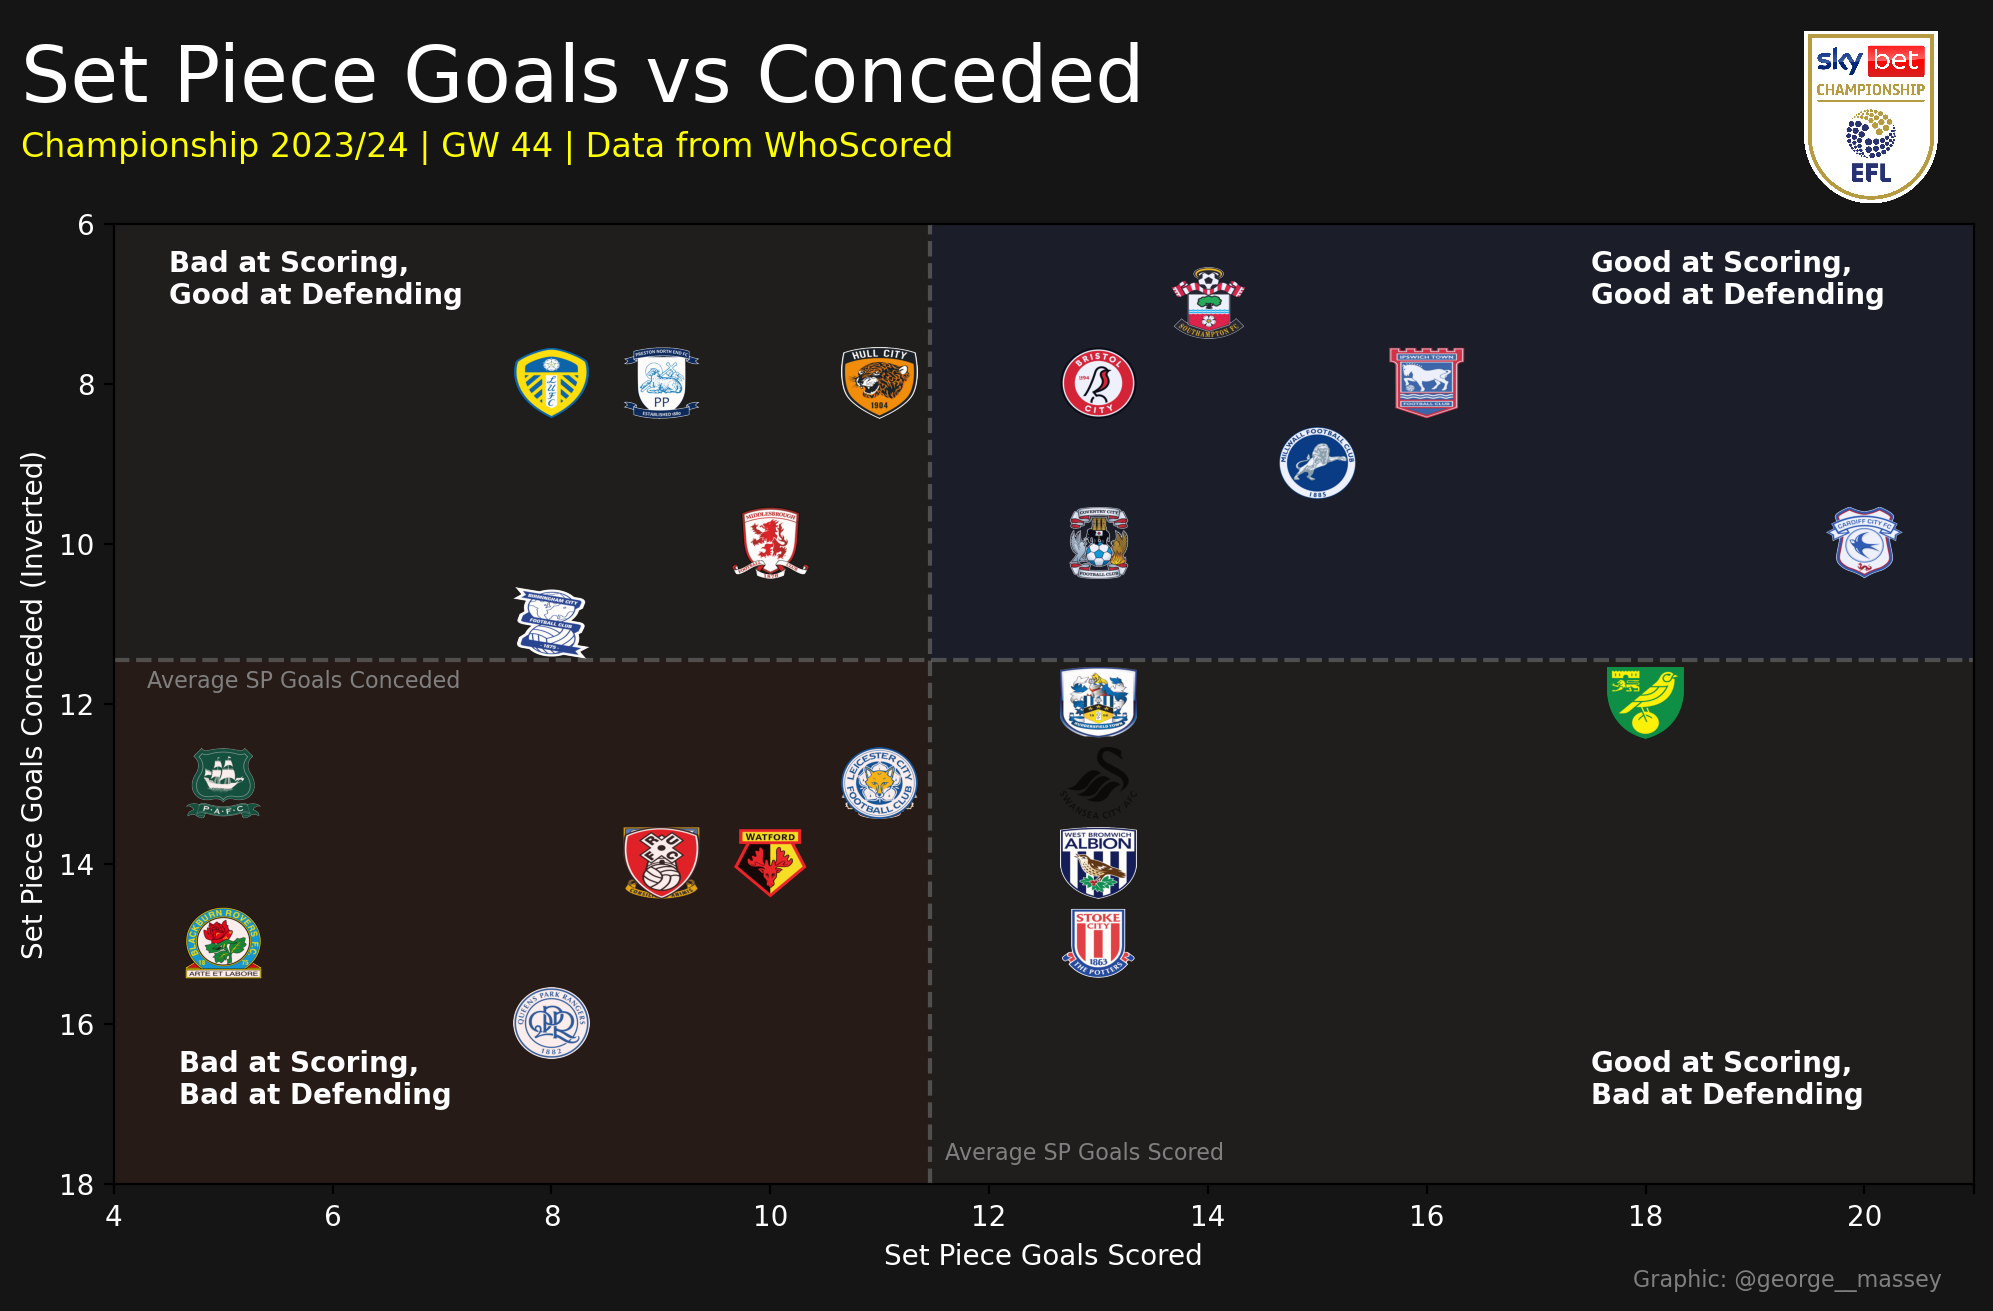

In [48]:
import matplotlib.patches as patches
from PIL import Image

plt.figure(figsize=(12, 8), dpi=200, facecolor='#141514')  # Set the facecolor to #141514

# Plot the badge at each point
for i, team in df.iterrows():
    badge = plt.imread(team['Badge'])
    plt.imshow(np.flipud(badge), extent=(team['For']-0.35, team['For']+0.35, team['Against']-0.45, team['Against']+0.45), aspect='auto', origin='upper',alpha=1)

# Add labels and title
plt.xlabel('Set Piece Goals Scored', color='white')  # Set the xlabel color to white
plt.ylabel('Set Piece Goals Conceded (Inverted)', color='white')  # Set the ylabel color to white
plt.yticks([6,8,10,12,14,16,18], color='white')  # Set the yticks color to white
plt.xticks([4,6,8,10,12,14,16,18,20,21],['4','6','8','10','12','14','16','18','20',''], color='white')  # Set the xticks color to white
plt.gca().invert_yaxis() # Invert the x-axis
# Adjust the plot limits if needed
# Calculate the average value
average_value = df['Against'].mean()
average_value2 = df['For'].mean()
# Draw a line from the y-axis at the average value
plt.axhline(average_value, color='grey', linestyle='--', alpha=0.5)
plt.axvline(average_value2, color='grey', linestyle='--', alpha=0.5)

# Set the colors for each quadrant
#colors = ['green', 'yellow', 'blue', 'red']
import matplotlib.cm as cm

# Set the colors for each quadrant using a colormap
cmap = cm.get_cmap('coolwarm')
colors = [cmap(0.1), cmap(0.3), cmap(0.6), cmap(0.9)]

# Create the rectangles
rect1 = patches.Rectangle((average_value2, average_value), width = df['For'].max()+2, height=df['Against'].max(), facecolor=colors[2], alpha=0.05)
rect2 = patches.Rectangle((average_value2, 0), width=df['For'].max()+2,height= average_value, facecolor=colors[0], alpha=0.1)
rect3 = patches.Rectangle((df['For'].min()-3, average_value), average_value2 - (df['For'].min()-3), height=df['Against'].max(), facecolor=colors[3], alpha=0.1)
rect4 = patches.Rectangle((df['For'].min()-3, 0), width=average_value2 - (df['For'].min()-3) , height=average_value, facecolor=colors[2], alpha=0.05)

# Add the rectangles to the plot
plt.gca().add_patch(rect1)
plt.gca().add_patch(rect2)
plt.gca().add_patch(rect3)
plt.gca().add_patch(rect4)
#plt.xlim(df['For'][::-1])
#plt.ylim(0, df['Against'].max()+50)

# Set the ticks color to white
plt.xticks(color='white')
plt.yticks(color='white')

# Set the plot background color to #141514
plt.gca().set_facecolor('#141514')
# Add text box in each quadrant


plt.subplots_adjust(top=0.85, bottom=0.25)
plt.text(-0.05, 1.15, 'Set Piece Goals vs Conceded', color='white', fontsize=28, transform=plt.gca().transAxes, ha='left', va='center')
plt.text(0.9, -0.1, 'Graphic: @george__massey', color='grey', fontsize=8, transform=plt.gca().transAxes, ha='center', va='center')
plt.text(-0.05, 1.08, 'Championship 2023/24 | GW 44 | Data from WhoScored', color='yellow', fontsize=12, transform=plt.gca().transAxes, ha='left', va='center')
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib as mpl

# Specify the backend to use (e.g., 'png', 'jpg', 'tiff')
#mpl.use('png')
# Load the image you want to add
logo_image = plt.imread("C:\\Users\\George\\Documents\\Football Analytics\\Images\\Championship_Logo.png")

# Create an OffsetImage instance with the loaded image
logo_offsetimage = OffsetImage(logo_image, zoom=0.04)  # Adjust the zoom value as needed

# Create an AnnotationBbox instance and add it to the plot
logo_box = AnnotationBbox(logo_offsetimage, (0.98, 1.2), xycoords='axes fraction', box_alignment=(1.0, 1.0), boxcoords="offset pixels")
ax = plt.gca()
ax.add_artist(logo_box)

# Make the box invisible, but keep the image visible
logo_box.patch.set_alpha(0)

plt.text(4.5, 7, 'Bad at Scoring, \nGood at Defending', color='white', fontsize=10, weight='bold')
plt.text(17.5, 7,'Good at Scoring, \nGood at Defending', color='white', fontsize=10, weight='bold')
plt.text(17.5, 17, 'Good at Scoring, \nBad at Defending', color='white', fontsize=10, weight='bold')
plt.text(4.6, 17, 'Bad at Scoring, \nBad at Defending', color='white', fontsize=10, weight='bold')
plt.text(4.3,11.8, 'Average SP Goals Conceded', color='grey', fontsize=8)
plt.text(11.6,17.7, 'Average SP Goals Scored', color='grey', fontsize=8)
plt.show()